In [0]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
from torch.utils.data  import TensorDataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# load train and test dataset of CIFAR10

In [0]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset=torchvision.datasets.CIFAR10('.',train=True,transform=transform,download=True)#load train dataset of CIFAR10
test_dataset=torchvision.datasets.CIFAR10('.',train=False,transform=transform,download=True)#load test dataset of CIFAR10


Files already downloaded and verified
Files already downloaded and verified


# convolutional neural network : "CNN_Cifar_10"

In [0]:

class CNN_Cifar_10(torch.nn.Module):
  def __init__(self)  :
    super(CNN_Cifar_10, self).__init__()
    self.conv1 = nn.Conv2d(3, 64, 5)
    self.conv2 = nn.Conv2d(64, 64, 5)
    self.pool2 = nn.MaxPool2d( kernel_size=2, stride=2, padding=0)
    self.conv3 = nn.Conv2d(64, 64, 3)
    self.pool3 = nn.MaxPool2d( kernel_size=2, stride=2, padding=0)
    self.fc1 = nn.Linear(64 * 5 * 5, 256)
    self.fc2 = nn.Linear(256, 10)

    
  def forward(self, x):
    relu1 = self.conv1(x).clamp(min=0)
    relu2 = self.pool2(self.conv2(relu1).clamp(min=0))
    relu3 = self.pool3(self.conv3(relu2).clamp(min=0))
    x=relu3
    x = x.view(-1, 64 * 5 * 5) #Flatting for input of Fully Connected
    x = self.fc1(x).clamp(min=0)
    x = self.fc2(x)
    
    return x
  
  
  
epoch=[]
losses=[]
loader = DataLoader(train_dataset, batch_size = 256, shuffle=True )
#test_loader = DataLoader(test_dataset, batch_size = 256, shuffle=True )
model=CNN_Cifar_10()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(),lr=0.001)

for t in range (100):
  l=0
  for x_batch, y_batch in loader:
    x_batch, y_batch = x_batch.to(device), y_batch.to(device)
    y_pred = model(x_batch)
    loss = criterion(y_pred, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    l+=loss
  losses.append(l/len(loader))
  epoch.append(t)




call pre-trained model

In [0]:
model=CNN_Cifar_10()

Freez Covcolutional layer of pre-trained model

In [0]:
model.conv1.requires_grad_(False)
model.conv2.requires_grad_(False)
model.conv3.requires_grad_(False)
model.fc1.requires_grad_(True)
model.fc2.requires_grad_(True)


Linear(in_features=256, out_features=10, bias=True)

modified last fully connected to predict 5 classes {'bicycle':**8**,  'bus':**13**, 'dolphine':**30**,'mountain':**49**, 'table':**84**}

In [0]:
model.fc2 = nn.Linear(256, 5)
model=model.to(device)

Seperate five classes: BICYCLE, BUS, DOLPHINE, MOUNTAIN, TABLE for train

In [0]:
#five_classes={'bicycle':8,  'bus':13, 'dolphine':30,, 'mountain':49'table':84}

transform_new = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_c100=torchvision.datasets.CIFAR100('.',train=True,transform=transform_new,download=True)#load train dataset of CIFAR100


train_c5_data=np.ones((2500,32,32,3), dtype=np.uint8)
train_c5_tag=[]
j=0
x=train_c100.data
y=train_c100.targets
for k in range(len(x)):
  if y[k] == 8:
    train_c5_tag.append(0)
    train_c5_data[j] = x[k]
    j = j+1
  
  if y[k] == 13:
    train_c5_tag.append(1)
    train_c5_data[j] = x[k]
    j = j+1

  if y[k] == 30:
    train_c5_tag.append(2)
    train_c5_data[j] = x[k]
    j = j+1
  
  if y[k] == 49:
    train_c5_tag.append(3)
    train_c5_data[j] = x[k]
    j = j+1 

  if y[k] == 84:
    train_c5_tag.append(4)
    train_c5_data[j] = x[k]
    j = j+1


train_c5_tag = torch.tensor(train_c5_tag, dtype=torch.long)
train_c5_data = torch.tensor(train_c5_data,dtype=torch.float)
train_loader = DataLoader(TensorDataset(train_c5_data, train_c5_tag), batch_size = 128,shuffle=True)

Files already downloaded and verified


Seperate five classes: BICYCLE, BUS, DOLPHINE, MOUNTAIN, TABLE for test

In [0]:
transform_new = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
test_c100=torchvision.datasets.CIFAR100('.',train=False,transform=transform_new,download=True)#load test dataset of CIFAR100

test_c5_data=np.ones((500,32,32,3), dtype=np.uint8)
test_c5_tag=[]
l=0
z=test_c100.data
t=test_c100.targets

for n in range(len(z)):
  if t[n] == 8:
    test_c5_tag.append(0)
    test_c5_data[l] = z[n]
    l = l+1
 
  if t[n] == 13:
    test_c5_tag.append(1)
    test_c5_data[l] = z[n]
    l = l+1
 
  if t[n] == 30:
    test_c5_tag.append(2)
    test_c5_data[l] = z[n]
    l = l+1
 
  if t[n] == 49:
    test_c5_tag.append(3)
    test_c5_data[l] = z[n]
    l = l+1
 
  if t[n] == 84:
    test_c5_tag.append(4)
    test_c5_data[l] = z[n]
    l = l+1
 
test_c5_tag = torch.tensor(test_c5_tag, dtype=torch.long)
test_c5_data = torch.tensor(test_c5_data,dtype=torch.float)
test_loader = DataLoader(TensorDataset(test_c5_data, test_c5_tag), batch_size = 128,shuffle=True)


Files already downloaded and verified


Train modified model with five classes dataset

In [0]:

epoch=[]
losses=[]
accur=[]
criterion = nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(),lr=0.001)
for t in range (100):
  l2=0
  correct2 = 0
  total2 = 0
  for x_b, y_b in train_loader:
    x_b, y_b = x_b.to(device), y_b.to(device)
    y_p = model(x_b.permute(0,3,1,2))
    loss2 = criterion(y_p, y_b)
    loss2.backward()
    optimizer.step()
    optimizer.zero_grad()
    l2+=loss2
  losses.append(l2/len(train_loader))
  print("LOSSSS",l2/len(train_loader))
  epoch.append(t)

  #Test:
  with torch.no_grad():
    for x_, y_ in test_loader :
        x_, y_ = x_.to(device), y_.to(device)
        y_prediction = model(x_.permute(0,3,1,2))
        _ ,y_prediction = y_prediction.max(1)
        total2 += y_.size(0)
        correct2 += (y_prediction == y_).sum().item()

  print('Accuracy of the CNN on the CIFAR10 test images: %d %%' % (
    100 * correct2 / total2))
  accur.append(100 * correct2 / total2)

LOSSSS tensor(1.9090, device='cuda:0', grad_fn=<DivBackward0>)
Accuracy of the CNN on the CIFAR10 test images: 53 %
LOSSSS tensor(0.7361, device='cuda:0', grad_fn=<DivBackward0>)
Accuracy of the CNN on the CIFAR10 test images: 69 %
LOSSSS tensor(0.5659, device='cuda:0', grad_fn=<DivBackward0>)
Accuracy of the CNN on the CIFAR10 test images: 68 %
LOSSSS tensor(0.5428, device='cuda:0', grad_fn=<DivBackward0>)
Accuracy of the CNN on the CIFAR10 test images: 70 %
LOSSSS tensor(0.5551, device='cuda:0', grad_fn=<DivBackward0>)
Accuracy of the CNN on the CIFAR10 test images: 71 %
LOSSSS tensor(0.5428, device='cuda:0', grad_fn=<DivBackward0>)
Accuracy of the CNN on the CIFAR10 test images: 69 %
LOSSSS tensor(0.4847, device='cuda:0', grad_fn=<DivBackward0>)
Accuracy of the CNN on the CIFAR10 test images: 71 %
LOSSSS tensor(0.4808, device='cuda:0', grad_fn=<DivBackward0>)
Accuracy of the CNN on the CIFAR10 test images: 69 %
LOSSSS tensor(0.4688, device='cuda:0', grad_fn=<DivBackward0>)
Accuracy 

# Plot of Loss

Text(0, 0.5, 'Loss')

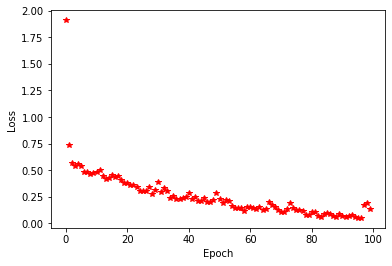

In [0]:
plt.plot(epoch, losses, 'r*')  
plt.xlabel("Epoch")
plt.ylabel("Loss")  

# Plot of Accuracy

Text(0, 0.5, 'Accuracy')

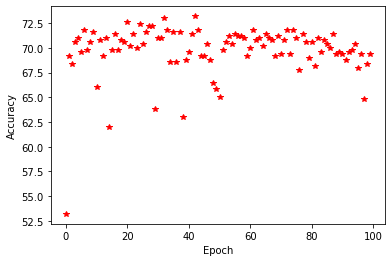

In [0]:
plt.plot(epoch, accur, 'r*')  
plt.xlabel("Epoch")
plt.ylabel("Accuracy") 